In [1]:
import cv2
import matplotlib.pyplot as plt

/home/aayush/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [2]:
img = cv2.imread('/media/aayush/New Volume/CMFD/06000/06000_Mask.jpg')

In [3]:
cv2.imshow("hi",img)

qt.qpa.plugin: Could not find the Qt platform plugin "wayland" in "/home/aayush/.local/lib/python3.10/site-packages/cv2/qt/plugins"


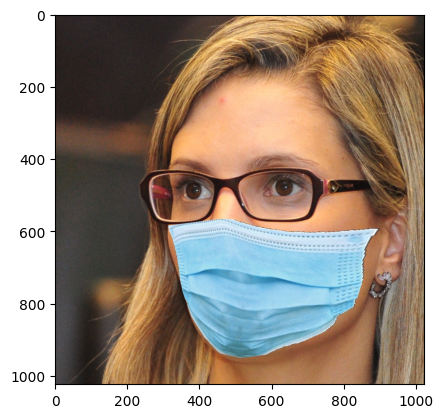

In [4]:
new = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 
plt.imshow(new)
plt.show()

In [ ]:
#Detecting Face using MTCNN

In [5]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing import image
import numpy as np
import pickle
from tqdm import tqdm
from sklearn.metrics.pairwise import cosine_similarity
from PIL import Image
import cv2
import matplotlib.pyplot as plt
from mtcnn import MTCNN

2024-05-22 00:06:37.238925: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-22 00:06:37.271492: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-22 00:06:37.271533: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-22 00:06:37.272609: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-05-22 00:06:37.277696: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-22 00:06:37.278000: I tensorflow/core/platform/cpu_feature_guard.cc:1

In [6]:
detector = MTCNN()

2024-05-22 00:06:42.474650: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-05-22 00:06:42.481219: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2256] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [7]:
results = detector.detect_faces(img)
print(results)
# x,y,width,height = results[0]['box']
# print(x,y,width,height)
# face = img[y:y+height,x:x+width]

1/1 [==============================] - 0s 161ms/step
[]


1/1 [==============================] - 0s 93ms/step


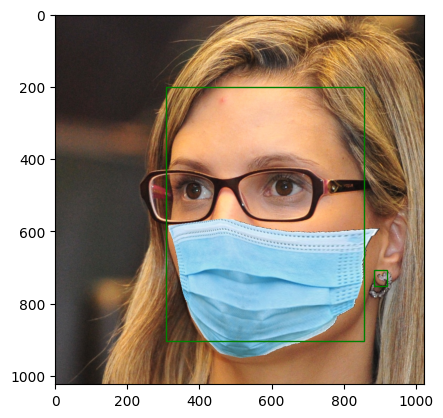

In [10]:
import matplotlib.pyplot as plt
from mtcnn.mtcnn import MTCNN
from matplotlib.patches import Rectangle
from matplotlib.patches import Circle
def draw_facebox(filename, result_list):
  data = plt.imread(filename)
  plt.imshow(data)
  ax = plt.gca()
  for result in result_list:
    x, y, width, height = result['box']
    rect = plt.Rectangle((x, y), width, height, fill=False, color='green')
    ax.add_patch(rect)
  plt.show()
filename = r'/media/aayush/New Volume/CMFD/06000/06000_Mask.jpg' #File location
pixels = plt.imread(filename) 
detector = MTCNN()
faces = detector.detect_faces(pixels)
draw_facebox(filename, faces)

In [8]:
import os
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
from tensorflow.keras.callbacks import ReduceLROnPlateau, ModelCheckpoint, EarlyStopping
from tensorflow.keras.models import Sequential,load_model,save_model
from tensorflow.keras.layers import Dense,Conv2D,Flatten,MaxPooling2D
from keras.layers import BatchNormalization
from keras.optimizers import Adam

In [9]:
base_model = tf.keras.applications.VGG16(input_shape=(64, 64, 3),include_top=False,weights="imagenet")


In [10]:
train_datagen = ImageDataGenerator(rescale = 1./255,
      rotation_range=25,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

In [11]:
batch_size = 64
target_size = (64, 64)
input_shape=(64, 64, 3)
seed=1337
adam = 0.001
fre= -20
FC = 2048
E = 1
patience = 3
verbose = 1
factor = 0.50
min_lr = 0.0001
epochs=8

In [12]:
test_datagen = ImageDataGenerator( rescale = 1.0/255)

train_generator = train_datagen.flow_from_directory('/media/aayush/New Volume/dataset/train',
                                                    batch_size =batch_size ,
                                                    class_mode = 'binary',
                                                    seed=seed,
                                                    target_size = target_size )     

validation_generator =  test_datagen.flow_from_directory( '/media/aayush/New Volume/dataset/valid',
                                                          batch_size  = batch_size,
                                                          class_mode  = 'binary',
                                                          seed=seed,
                                                          target_size = target_size)

Found 6421 images belonging to 2 classes.
Found 716 images belonging to 2 classes.


In [13]:
print(train_generator.class_indices)

{'female': 0, 'male': 1}


In [32]:
steps_per_epoch=6421//batch_size
validation_steps=716//batch_size

In [33]:
for layer in base_model.layers[:fre]:
    layer.trainable=False

In [34]:
model=Sequential()
model.add(base_model)
model.add(layers.Dropout(.2))

model.add(Conv2D(512, (3, 3),strides=(1,1), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(layers.Dropout(.1))
model.add(Conv2D(128, (3, 3),strides=(1,1), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(layers.Dropout(.1))
model.add(Conv2D(384, (3, 3),strides=(1,1), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(layers.Dropout(.1))
model.add(Conv2D(384, (3, 3),strides=(1,1), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(layers.Dropout(.1))
model.add(Conv2D(500, (3, 3),strides=(1,1), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(2,strides=(2,2), padding='same'))



# Add new layers
model.add(Flatten())
model.add(Dense(FC , activation='relu'))
model.add(layers.Dropout(.2))
model.add(Dense(FC , activation='relu'))
model.add(layers.Dropout(.2))
model.add(Dense(FC, activation='relu'))
model.add(layers.Dropout(.2))
model.add(Dense(E, activation='sigmoid'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 2, 2, 512)         14714688  
                                                                 
 dropout_16 (Dropout)        (None, 2, 2, 512)         0         
                                                                 
 conv2d_34 (Conv2D)          (None, 2, 2, 512)         2359808   
                                                                 
 batch_normalization_10 (Ba  (None, 2, 2, 512)         2048      
 tchNormalization)                                               
                                                                 
 dropout_17 (Dropout)        (None, 2, 2, 512)         0         
                                                                 
 conv2d_35 (Conv2D)          (None, 2, 2, 128)         589952    
                                                      

In [35]:
model.compile(optimizer=Adam(adam),
              loss='binary_crossentropy'
              ,metrics=['accuracy'])

In [36]:
lrd = ReduceLROnPlateau(monitor = 'val_loss',
                        patience = patience,
                        verbose = verbose ,
                        factor = factor,
                        min_lr = min_lr)

mcp = ModelCheckpoint('model.h5')

es = EarlyStopping(verbose=verbose, patience=patience)

In [37]:
%time
hist = model.fit_generator(generator=train_generator,
                           validation_data=validation_generator,
                           steps_per_epoch=steps_per_epoch,
                           validation_steps=validation_steps,
                           epochs=epochs,
                           callbacks=[lrd, mcp, es])

CPU times: user 10 µs, sys: 0 ns, total: 10 µs
Wall time: 19.3 µs


/tmp/ipykernel_11051/1157127437.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  hist = model.fit_generator(generator=train_generator,


Epoch 1/8
100/100 [==============================] - ETA: 0s - loss: 0.7163 - accuracy: 0.6182

/home/aayush/.local/lib/python3.10/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


100/100 [==============================] - 440s 4s/step - loss: 0.7163 - accuracy: 0.6182 - val_loss: 0.9104 - val_accuracy: 0.4773 - lr: 0.0010
Epoch 2/8
100/100 [==============================] - 434s 4s/step - loss: 0.5833 - accuracy: 0.6612 - val_loss: 7.9798 - val_accuracy: 0.4773 - lr: 0.0010
Epoch 3/8
100/100 [==============================] - 454s 5s/step - loss: 0.5699 - accuracy: 0.6731 - val_loss: 0.8051 - val_accuracy: 0.5227 - lr: 0.0010
Epoch 4/8
100/100 [==============================] - 451s 5s/step - loss: 0.5499 - accuracy: 0.6953 - val_loss: 5.7543 - val_accuracy: 0.4773 - lr: 0.0010
Epoch 5/8
100/100 [==============================] - 436s 4s/step - loss: 0.5299 - accuracy: 0.7106 - val_loss: 7.9655 - val_accuracy: 0.4716 - lr: 0.0010
Epoch 6/8
100/100 [==============================] - 435s 4s/step - loss: 0.5249 - accuracy: 0.7238 - val_loss: 0.5688 - val_accuracy: 0.7599 - lr: 0.0010
Epoch 7/8
100/100 [==============================] - 420s 4s/step - loss: 0.5190

1/1 [==============================] - 0s 111ms/step
[0.]
This is a male


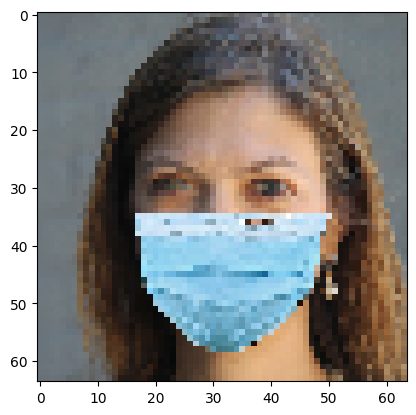

In [41]:
import numpy as np

from keras.preprocessing import image
#  images test 1
path_testmodel = "/media/aayush/New Volume/CMFD/31000/31089_Mask.jpg"
imge = image.load_img(path_testmodel, target_size=target_size)
X = image.img_to_array(imge)
X = np.expand_dims(X, axis=0)

images = np.vstack([X])
classes = model.predict(images, batch_size=1)
print(classes[0])
if classes[0]<0.5:
    print("This is a male")
else:
    print( "This  is a female")
plt.imshow(imge)